In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker

In [20]:
df = pd.read_csv(r'C:\Users\amaan\OneDrive\Desktop\python\data analysis\Python_Amazon_Sales_Analysis-main\Amazon Sale .csv',encoding= 'unicode_escape')

In [21]:
df.shape

(128976, 21)

In [32]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False


### **Data Cleaning and Transformation**

In [23]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

#### **Dropping the "full_filled_by" Column because it has so many Null values**

In [24]:
df.drop(['fulfilled-by'] , axis = 1 , inplace =True)

In [25]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
New                   128976
PendingS              128976
dtype: int64

#### **Dropping the "New" and "pending" Column because it has so many Null values**

In [26]:
df.drop(['New','PendingS'], axis = 1 ,inplace=True)

#### **Dropping Null Values**

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121143 non-null  int64  
 1   Order ID            121143 non-null  object 
 2   Date                121143 non-null  object 
 3   Status              121143 non-null  object 
 4   Fulfilment          121143 non-null  object 
 5   Sales Channel       121143 non-null  object 
 6   ship-service-level  121143 non-null  object 
 7   Category            121143 non-null  object 
 8   Size                121143 non-null  object 
 9   Courier Status      121143 non-null  object 
 10  Qty                 121143 non-null  int64  
 11  currency            121143 non-null  object 
 12  Amount              121143 non-null  float64
 13  ship-city           121143 non-null  object 
 14  ship-state          121143 non-null  object 
 15  ship-postal-code    121143 non-null  fl

#### **Changing the datatype of Columns**

In [ ]:
df['Date']=pd.to_datetime (df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121143 non-null  int64         
 1   Order ID            121143 non-null  object        
 2   Date                121143 non-null  datetime64[ns]
 3   Status              121143 non-null  object        
 4   Fulfilment          121143 non-null  object        
 5   Sales Channel       121143 non-null  object        
 6   ship-service-level  121143 non-null  object        
 7   Category            121143 non-null  object        
 8   Size                121143 non-null  object        
 9   Courier Status      121143 non-null  object        
 10  Qty                 121143 non-null  int64         
 11  currency            121143 non-null  object        
 12  Amount              121143 non-null  float64       
 13  ship-city           121143 non-nul

#### **Rename the column name "QTY" to "Quantity"**

In [53]:
df.rename(columns={'Qty' : 'Quantity'}, inplace=True)

In [16]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,121143.000000,121143,121143.000000,121143.000000,121143.000000
mean,64486.312655,2022-05-12 12:11:22.182214144,0.961252,648.576874,463623.724507
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32294.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64477.000000,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,96682.500000,2022-06-04 00:00:00,1.000000,788.000000,600020.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,37220.415404,NaN,0.214276,281.196896,191301.588170


In [17]:
df.describe(include = 'object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country
count,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143
unique,112861,12,2,1,2,9,11,3,1,8697,68,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN
freq,12,77589,83629,121143,82713,47038,20965,109458,121143,10675,21084,121143


## **Exploratory Data Analysis and Visualization**

In [35]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

#### **Analyzing  Size column**

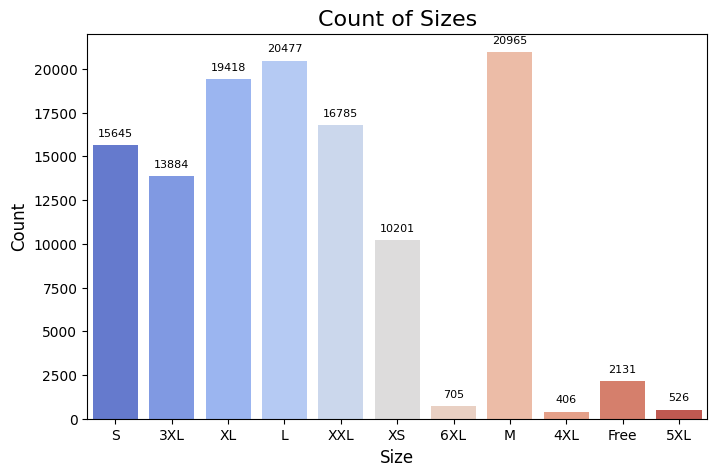

In [85]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Size', data=df, hue='Size', palette='coolwarm', legend=False)

for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', padding=5, fontsize=8,  color='black')

plt.title('Count of Sizes', fontsize=16)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


##### **Note : From above chart you can see most of the peaple Buys M-Size**

#### **Group by Size and sum Quantity**

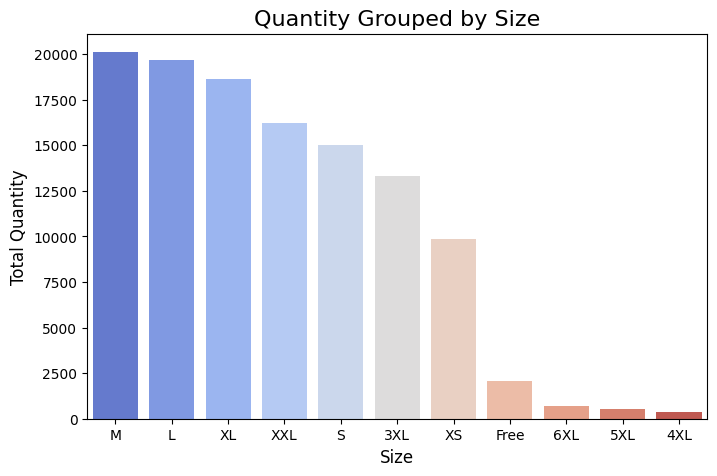

In [84]:
S_quantity = df.groupby('Size', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Size', y='Quantity', hue='Size', data=S_quantity, palette='coolwarm', legend=False)

plt.xlabel('Size', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.title('Quantity Grouped by Size', fontsize=16,)

plt.show()


##### **Note : From above chart you can see most of the Quantity Buys M-Size**

In [88]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

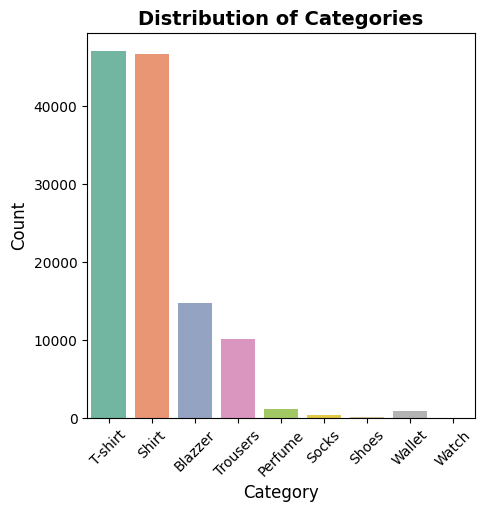

In [104]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Category', data=df, hue='Category', palette='Set2', legend=False)  
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()



##### **Note : From above chart you can see most of the people Buys T-Shirt**

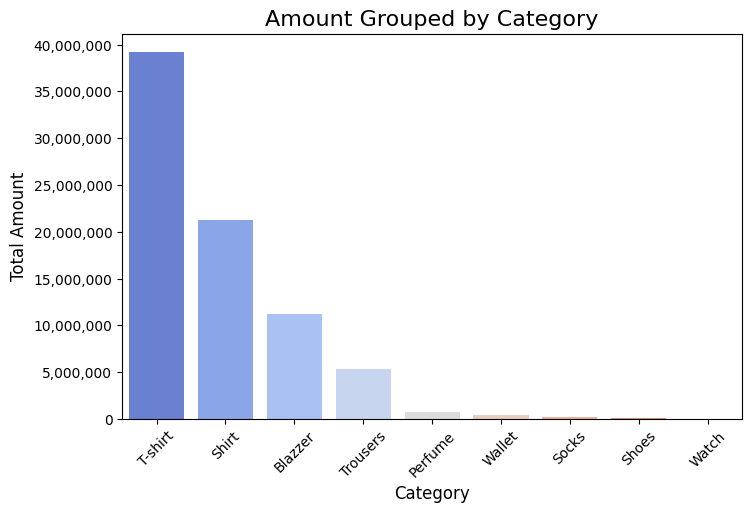

In [103]:
S_amount = df.groupby('Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Category', y='Amount', data=S_amount, hue='Category', palette='coolwarm', legend=False)  

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.title('Amount Grouped by Category', fontsize=16)

plt.xticks(rotation=45)
plt.show()


##### **Note : From the above chart you can see most of the revemue genrated by T-Shirt**

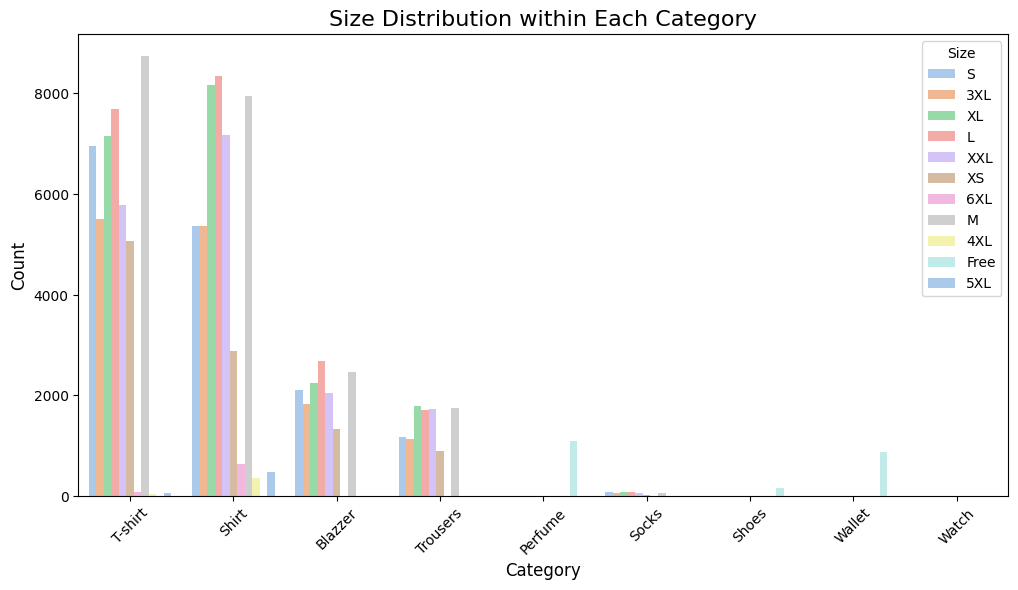

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Size', data=df, palette='pastel')
plt.title('Size Distribution within Each Category', fontsize=16 )
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


##### **Note : From the above chart you can easily identify the most popular size for each category based on sales**

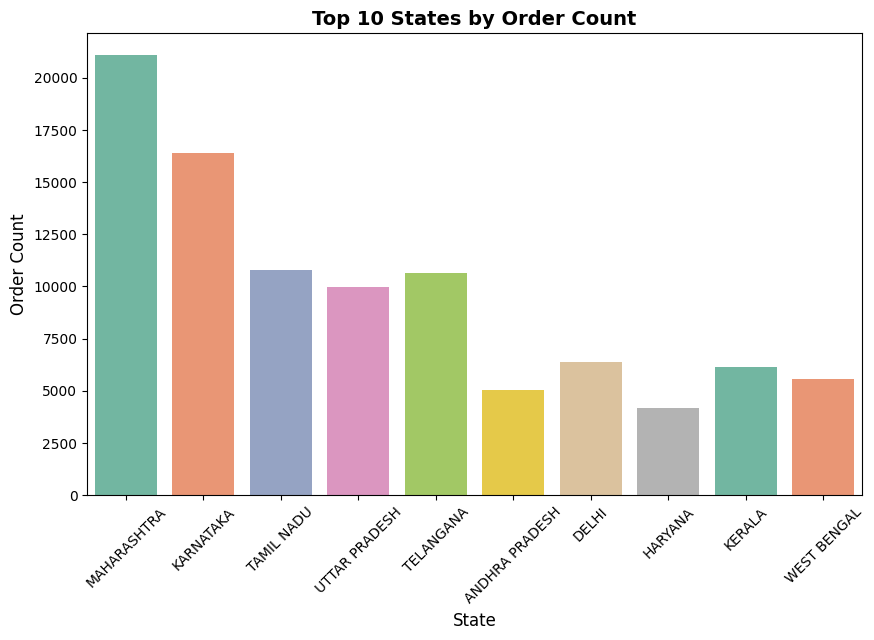

In [117]:
state_counts = df['ship-state'].value_counts()
top_10_states = state_counts.head(10)
plt.figure(figsize=(10, 6))
sns.countplot(x='ship-state', data=df[df['ship-state'].isin(top_10_states.index)], hue='ship-state', palette='Set2')
plt.title('Top 10 States by Order Count', fontsize=14, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()



##### **Note : From the above chart you can see the 10 states with the highest number of orders.**

## **Conclusion**

#### The analysis highlights that certain states such as Maharashtra and Karnataka contribute significantly to the total order volume and revenue. In terms of product preferences, T-shirts in Medium (M) size are the most popular choice among customers, reflecting a strong demand for these items. The insights suggest that the business can further capitalize on these high-demand regions and products by focusing on targeted marketing and optimizing inventory for these specific categories and sizes.